# Getting Started

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')

In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Preprocessing

## Missing Values

In [ ]:
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

## Encoding

In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [ ]:
data = binary_encode(data, 'Gender', 'Male')

Let's change the labels to 0, 1 instead of 1, 2

In [ ]:
data = binary_encode(data, 'Dataset', 1)

## Splitting and Scaling

In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


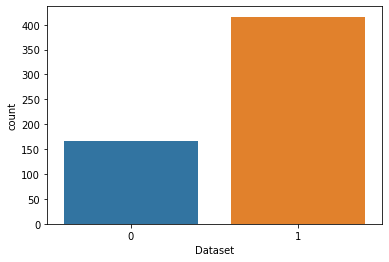

In [ ]:
sns.countplot(x='Dataset',data=data)

In [ ]:
y = data['Dataset']
X = data.drop('Dataset', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=101)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating The Model


In [ ]:
X.shape

(583, 10)

In [ ]:
y.sum() / len(y)

0.7135506003430532

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [ ]:
model=Sequential()

model.add(Dense(units=10,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=5,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(
    optimizer='adam',
    loss='binary_crossentropy')



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Training


In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/600
15/15 [==============================] - 1s 18ms/step - loss: 0.7267 - val_loss: 0.7008
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6969 - val_loss: 0.6858
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6891 - val_loss: 0.6725
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6723 - val_loss: 0.6635
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6562
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6598 - val_loss: 0.6508
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6589 - val_loss: 0.6464
Epoch 8/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6553 - val_loss: 0.6432
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6613 - val_loss: 0.6408
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6546 - val_loss: 0.6380
Epoch 11

# Results

In [ ]:
model_loss = pd.DataFrame(model.history.history)

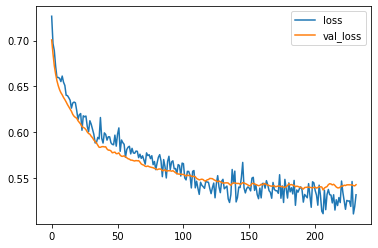

In [ ]:
model_loss.plot()

In [ ]:
pred=(model.predict(X_test) > 0.5).astype("int64")

4/4 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.84        84

    accuracy                           0.72       117
   macro avg       0.36      0.50      0.42       117
weighted avg       0.52      0.72      0.60       117



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predicting New Data

In [ ]:
new_data=np.array([[60,1,0.5,0.1,500,20,34,5.9,1.6,0.37]])
new_data = scaler.transform(new_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
predictions = (model.predict(new_data) > 0.5).astype("int32")
predictions

1/1 [==============================] - 0s 21ms/step


array([[1]], dtype=int32)

In [ ]:
if (predictions[0]==0):
  print('The person does not have Liver Failure')

else:
  print('The person has Liver Failure')

The person has Liver Failure
